# Machine Learning Capstone project
## Project: Predicting Stock Prices
## Project Overview
## Problem Statement
## Metrics

# Analysis
##

## Data Exploration

For stock price prediction finance data was downloaded from Yahoo finance https://finance.yahoo.com/quote/CSV/history?p=CSV. 

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from datetime import datetime

# Import cross validation

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load prices dataset
data = pd.read_csv("financial_data.csv")
data_validation = pd.read_csv("financial_data_check.csv")

featuresMy = []

ds_length = data.shape[0]
print ds_length
X_forecast = []
X_forecast.append([ds_length - 5])
X_forecast.append([ds_length - 4])
X_forecast.append([ds_length - 3])
X_forecast.append([ds_length - 2])
X_forecast.append([ds_length - 1])

print data.head()
print '\n'

for index in range(len(data)):
    featuresMy.append([index])

print '\n'

prices = data['Adj Close']
prices_real = data_validation['Adj Close']
# features = data.drop('Adj Close', axis = 1)

# Success
print "Financial dataset has {} data points with {} variables each.".format(*data.shape)

53
         Date         Open         High          Low        Close  \
0  2017-11-10  2580.179932  2583.810059  2575.570068  2582.300049   
1  2017-11-13  2576.530029  2587.659912  2574.479980  2584.840088   
2  2017-11-14  2577.750000  2579.659912  2566.560059  2578.870117   
3  2017-11-15  2569.449951  2572.840088  2557.449951  2564.620117   
4  2017-11-16  2572.949951  2590.090088  2572.949951  2585.639893   

     Adj Close      Volume  
0  2582.300049  3486910000  
1  2584.840088  3402930000  
2  2578.870117  3641760000  
3  2564.620117  3558890000  
4  2585.639893  3312710000  




Financial dataset has 53 data points with 7 variables each.


## Exploratory Visualization

## Algorithms and Techniques

## Benchmark

# Methodology
## 

## Data Preprocessing

## Implementation

## Refinement

# Results
## 

## Model Evaluation and Validation

## Justification

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

         Date         Open         High          Low        Close  \
0  2017-11-10  2580.179932  2583.810059  2575.570068  2582.300049   
1  2017-11-13  2576.530029  2587.659912  2574.479980  2584.840088   
2  2017-11-14  2577.750000  2579.659912  2566.560059  2578.870117   
3  2017-11-15  2569.449951  2572.840088  2557.449951  2564.620117   
4  2017-11-16  2572.949951  2590.090088  2572.949951  2585.639893   

     Adj Close      Volume  
0  2582.300049  3486910000  
1  2584.840088  3402930000  
2  2578.870117  3641760000  
3  2564.620117  3558890000  
4  2585.639893  3312710000  


Financial dataset has 53 data points with 7 variables each.


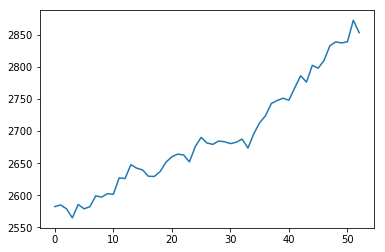

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

# Import cross validation
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv("financial_data.csv")

print data.head()
print '\n'

prices = data['Adj Close']
# features = data.drop('Adj Close', axis = 1)

plt.plot(prices)
    
# Success
print "Financial dataset has {} data points with {} variables each.".format(*data.shape)

In [123]:
minimum_price = np.min(prices)
maximum_price = np.max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $2,564.62
Maximum price: $2,872.87
Mean price: $2,690.27
Median price $2,679.25
Standard deviation of prices: $83.83


----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

In [105]:
def test_stationarity(data):
    
    #Determing rolling statistics
    rolmean = data.rolling(window=20,center=False).mean()
    rolmean = data

    #Plot rolling statistics:
    orig = plt.plot(data, color='blue',label='Original line')
    mean = plt.plot(rolmean, color='red', label='With rolling mean')

    plt.title('Rolling Mean')

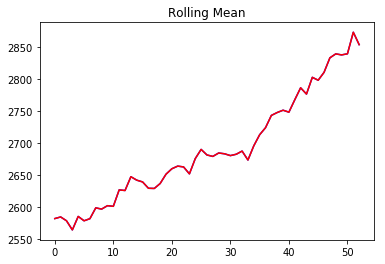

In [106]:
test_stationarity(prices)

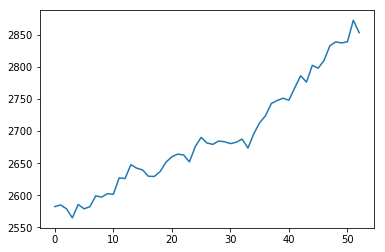

In [107]:
#ts_log = np.log(prices)
ts_log = prices
plt.plot(ts_log)

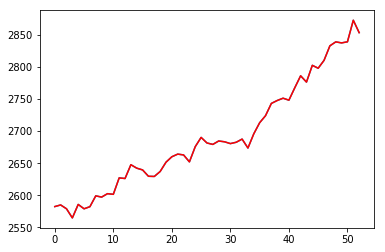

In [109]:
moving_avg = ts_log.rolling(min_periods=1,window=10,center=False).mean()
moving_avg = ts_log
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [110]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [111]:
from sklearn import cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(featuresMy, prices, test_size=0.2, train_size=0.8, random_state=3)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Implementation: Fitting a Model

In [112]:
def test_results(historiacal, forecasted):
    
    #Plot rolling statistics
    plt.plot(historiacal, color='red', label='With rolling mean')
    plt.plot(forecasted, color='blue', label='With rolling mean')
    plt.title('Test results')
    plt.show()

In [117]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train, y_train)
print regr.get_params()
print 'RandomForest test data score: ', regr.score(X_test, y_test)

{'warm_start': False, 'oob_score': False, 'n_jobs': 1, 'min_impurity_decrease': 0.0, 'verbose': 0, 'max_leaf_nodes': None, 'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'mse', 'random_state': 0, 'min_impurity_split': None, 'max_features': 'auto', 'max_depth': None}
RandomForest test data score:  0.985628179307


[ 2828.8929934  2831.1780274  2835.290039   2843.285034   2843.285034 ]


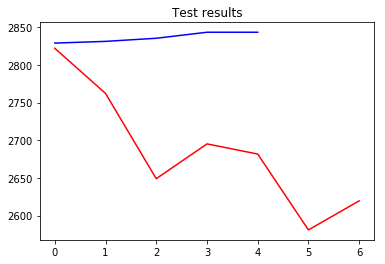

In [118]:
# Trying to predict new valies
Y_predict = regr.predict(X_forecast)
print Y_predict
test_results(prices_real, Y_predict)

In [119]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression(n_jobs=10,copy_X=False)
regr.fit(X_train, y_train)
print regr.get_params()
print 'LinearRegression test data score: ', regr.score(X_test, y_test)

{'copy_X': False, 'normalize': False, 'n_jobs': 10, 'fit_intercept': True}
LinearRegression test data score:  0.926393843842


[ 2800.07334764  2805.17534096  2810.27733427  2815.37932758  2820.48132089]


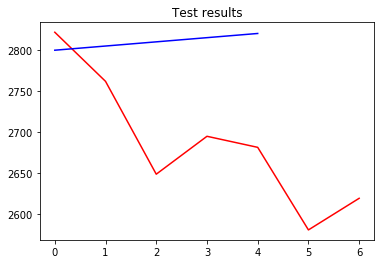

In [120]:
# Trying to predict new valies
Y_predict = regr.predict(X_forecast)
print Y_predict
test_results(prices_real, Y_predict)

In [121]:
from sklearn.neighbors import KNeighborsRegressor
regr = KNeighborsRegressor(n_neighbors=2)
regr.fit(X_train, y_train)
print regr.get_params()
print 'KNeighborsClassifier test data score: ', regr.score(X_test, y_test)

{'n_neighbors': 2, 'n_jobs': 1, 'algorithm': 'auto', 'metric': 'minkowski', 'metric_params': None, 'p': 2, 'weights': 'uniform', 'leaf_size': 30}
KNeighborsClassifier test data score:  0.987602376408


[ 2835.255005  2835.255005  2845.535034  2845.535034  2845.535034]


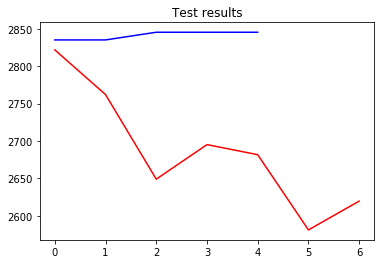

In [122]:
# Trying to predict new valies
Y_predict = regr.predict(X_forecast)
print Y_predict
test_results(prices_real, Y_predict)